This is a Julian fork of the 12 steps to Navier-Stokes (Python) [https://github.com/barbagroup/CFDPython] by Lorena A. Barba, Gilbert F. Forsyth . All content of that work is under Creative Commons Attribution CC-BY 4.0, and all python code is under BSD-3 clause.  This work also derives from similar forks by Cysor [https://github.com/Cysor/CFDJulia] and by Wallace-dyfq [https://github.com/Wallace-dyfq/CFD-Julia-12-steps--o-Navier-Stokes-Equations]




Step 1: 1-D Linear Convection
-----
***

The 1-D Linear Convection equation is the simplest, most basic model that can be used to learn something about CFD. It is surprising that this little equation can teach us so much! Here it is:

$$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$$

With given initial conditions (understood as a *wave*), the equation represents the propagation of that initial *wave* with speed $c$, without change of shape. Let the initial condition be $u(x,0)=u_0(x)$. Then the exact solution of the equation is $u(x,t)=u_0(x-ct)$.

We discretize this equation in both space and time, using the Forward Difference scheme for the time derivative and the Backward Difference scheme for the space derivative. Consider discretizing the spatial coordinate $x$ into points that we index from $i=0$ to $N$, and stepping in discrete time intervals of size $\Delta t$.

From the definition of a derivative (and simply removing the limit), we know that:

$$\frac{\partial u}{\partial x}\approx \frac{u(x+\Delta x)-u(x)}{\Delta x}$$

Our discrete equation, then, is:

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0 $$

Where $n$ and $n+1$ are two consecutive steps in time, while $i-1$ and $i$ are two neighboring points of the discretized $x$ coordinate. If there are given initial conditions, then the only unknown in this discretization is $u_i^{n+1}$.  We can solve for our unknown to get an equation that allows us to advance in time, as follows:

$$u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)$$

Now let's try implementing this in Julia.  

In [1]:
using Plots

In [2]:
L = 2.0
nx = 41 ; # try changing this number from 41 to 81 and Run All ... what happens?
Δx = L/(nx-1);

Tₑ = .625
nt = 25 ;   #nt is the number of time steps we want to calculate
Δt = Tₑ/nt ; #Δt is the size of each time step

c = 1; 

In [3]:
x = range(0, L; length = nx)
t = range(0, Tₑ; length = nt)

print(collect(x))

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5, 1.55, 1.6, 1.65, 1.7, 1.75, 1.8, 1.85, 1.9, 1.95, 2.0]

In [4]:
u₀ = ones(nx);

u₀[0.5 .≤ x .≤ 1.0] .= 2   # boolean indexing!

11-element view(::Array{Float64,1}, [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]) with eltype Float64:
 2.0
 2.0
 2.0
 2.0
 2.0
 2.0
 2.0
 2.0
 2.0
 2.0
 2.0

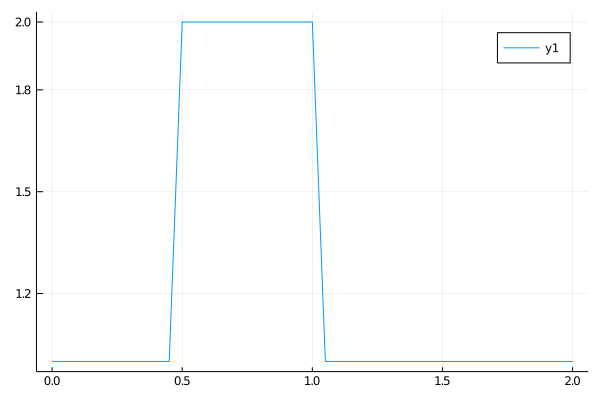

In [5]:
plot(x, u₀)

Why doesn't the hat function have perfectly straight sides? Think for a bit.

Now it's time to implement the discretization of the convection equation using a finite-difference scheme.  

For every element of our array `u`, we need to perform the operation $u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)$

We'll store the result in a new (temporary) array `un`, which will be the solution $u$ for the next time-step.  We will repeat this operation for as many time-steps as we specify and then we can see how far the wave has convected.  

We first initialize our placeholder array `un` to hold the values we calculate for the $n+1$ timestep, using once again the NumPy function `ones()`.

Then, we may think we have two iterative operations: one in space and one in time (we'll learn differently later), so we'll start by nesting one loop inside the other. Note the use of the nifty `range()` function. When we write: `for i in range(1,nx)` we will iterate through the `u` array, but we'll be skipping the first element (the zero-th element).  *Why?*

In [6]:
uⁿ⁺¹ = similar(u₀)    #preallocate
uⁿ⁺¹ .= u₀    #in place operation

uⁿ = similar(u₀)

for n in 1:nt     #loop for values of n from 0 to nt, so it will run nt times
    uⁿ .= uⁿ⁺¹     #in place operation
    for i in 2:nx 
        uⁿ⁺¹[i] = uⁿ[i] - c * Δt/Δx *(uⁿ[i]-uⁿ[i-1]);
    end
end
        
        

**Note**—We will learn later that the code as written above is quite inefficient, and there are better ways to write this in Julia. But let's carry on.

Now let's try plotting our `u` array after advancing in time.

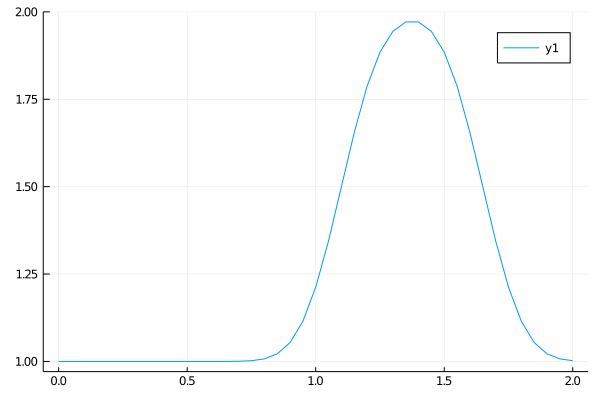

In [7]:
plot(x, uⁿ⁺¹)

OK! So our hat function has definitely moved to the right, but it's no longer a hat.  **What's going on?**